# Lake Model Solutions

## Excercise 1

We begin by initializing the variables and import the necessary modules

In [1]:
%pylab inline
import LakeModel

alpha = 0.012
lamb = 0.2486
b = 0.001808
d = 0.0008333
g = b-d
N0 = 100.
e0 = 0.92
u0 = 1-e0
T = 50

Populating the interactive namespace from numpy and matplotlib


Now construct the class containing the initial conditions of the problem

In [2]:
LM0 = LakeModel.LakeModel(lamb,alpha,b,d)
x0 = LM0.find_steady_state()# initial conditions

print "Initial Steady State: ", x0

Initial Steady State:  [ 0.94737184  0.05262816]


New legislation changes $\lambda$ to $0.2$

In [3]:
LM1 = LakeModel.LakeModel(0.2,alpha,b,d)

In [4]:
xbar = LM1.find_steady_state() # new steady state
X_path = vstack(LM1.simulate_stock_path(x0*N0,T)) # simulate stocks
x_path = vstack(LM1.simulate_rate_path(x0,T)) # simulate rates
print "New Steady State: ", xbar

New Steady State:  [ 0.93540871  0.06459129]


Now plot stocks

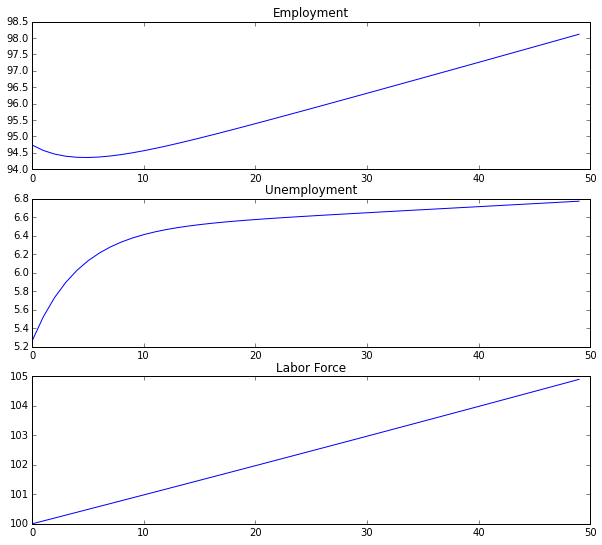

In [5]:
figure(figsize=[10,9])
subplot(3,1,1)
plot(X_path[:,0])
title(r'Employment')
subplot(3,1,2)
plot(X_path[:,1])
title(r'Unemployment')
subplot(3,1,3)
plot(X_path.sum(1))
title(r'Labor Force')

And how the rates evolve:

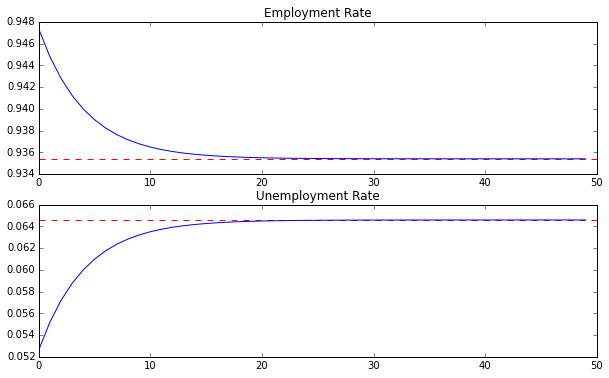

In [6]:
figure(figsize=[10,6])
subplot(2,1,1)
plot(x_path[:,0])
hlines(xbar[0],0,T,'r','--')
title(r'Employment Rate')
subplot(2,1,2)
plot(x_path[:,1])
hlines(xbar[1],0,T,'r','--')
title(r'Unemployment Rate')

We see that it takes 20 periods for the economy to converge to it's new steady state levels

## Exercise 2

This next exercise has the economy expriencing a boom in entrances to the labor market and then later returning to the original levels.  For 20 periods the economy has a new entry rate into the labor market 

In [7]:
bhat = 0.003
T_hat = 20
LM1 = LakeModel.LakeModel(lamb,alpha,bhat,d)

We simulate for 20 periods at the new parameters

In [8]:
X_path1 = vstack(LM1.simulate_stock_path(x0*N0,T_hat)) # simulate stocks
x_path1 = vstack(LM1.simulate_rate_path(x0,T_hat)) # simulate rates

Now using the state after 20 periods for the new initial conditions we simulate for the additional 30 periods

In [9]:
X_path2 = vstack(LM0.simulate_stock_path(X_path1[-1,:2],T-T_hat+1)) # simulate stocks
x_path2 = vstack(LM0.simulate_rate_path(x_path1[-1,:2],T-T_hat+1)) # simulate rates

Finally we combine these two paths and plot

In [10]:
x_path = vstack([x_path1,x_path2[1:]]) # note [1:] to avoid doubling period 20
X_path = vstack([X_path1,X_path2[1:]]) # note [1:] to avoid doubling period 20

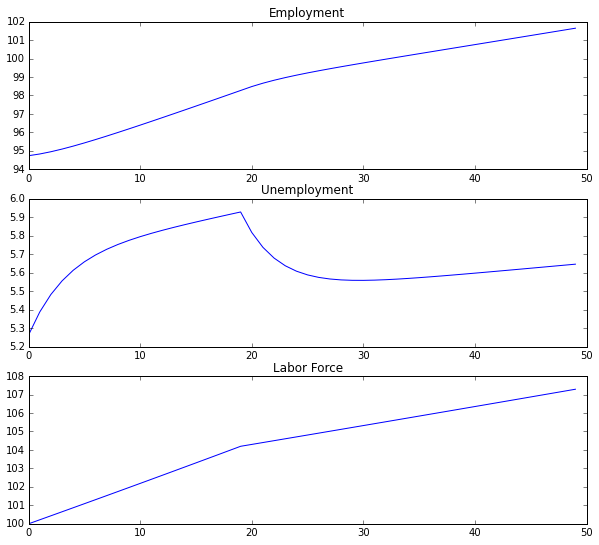

In [11]:
figure(figsize=[10,9])
subplot(3,1,1)
plot(X_path[:,0])
title(r'Employment')
subplot(3,1,2)
plot(X_path[:,1])
title(r'Unemployment')
subplot(3,1,3)
plot(X_path.sum(1))
title(r'Labor Force')

And the rates:

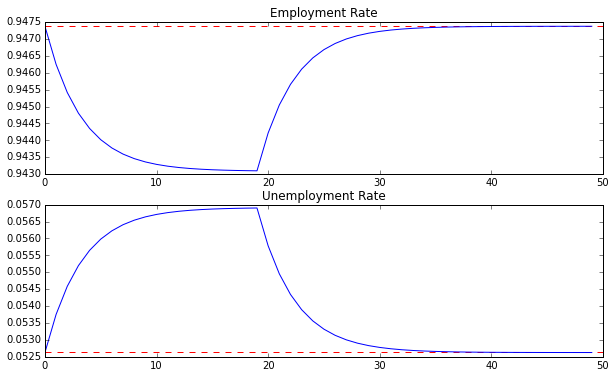

In [12]:
figure(figsize=[10,6])
subplot(2,1,1)
plot(x_path[:,0])
hlines(x0[0],0,T,'r','--')
title(r'Employment Rate')
subplot(2,1,2)
plot(x_path[:,1])
hlines(x0[1],0,T,'r','--')
title(r'Unemployment Rate')